# 标准化

In [1]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))
data_scaled = scaler.transform(data)
data_recovered = scaler.inverse_transform(data_scaled)
print("raw:\n",data)
print("scaled:\n",data_scaled)
print("recovered:\n",data_recovered)

StandardScaler()
raw:
 [[0, 0], [0, 0], [1, 1], [1, 1]]
scaled:
 [[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
recovered:
 [[0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]]


# 特征提取

In [2]:
from sklearn.feature_extraction import DictVectorizer
measurements = [
   {'city': 'Dubai', 'temperature': 33.},
   {'city': 'London', 'temperature': 12.},
   {'city': 'San Francisco', 'temperature': 18.},
]
vec = DictVectorizer(sparse=True)# #sparse=True意思是产生稀疏矩阵
feature_one_hot = vec.fit_transform(measurements).toarray()
print("feature names ",vec.get_feature_names())
print("features (one-hot)",feature_one_hot)


feature names  ['city=Dubai', 'city=London', 'city=San Francisco', 'temperature']
features (one-hot) [[ 1.  0.  0. 33.]
 [ 0.  1.  0. 12.]
 [ 0.  0.  1. 18.]]


# one hot编码

In [3]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

labels = ['nanjing','shanghai','beijing','shenzhen']
datas = [[1,2,3,4],[5,6,7,8]]
le = LabelEncoder()
labels = le.fit_transform(labels)
print("labels:",labels)

print("raw data:",datas)
ohe = OneHotEncoder()
trans_feature = ohe.fit_transform(datas)
print("One hot:",trans_feature) #第i行第j列为1，其它为0 print(trans_feature.toarray())
trans_feature = ohe.inverse_transform(trans_feature)
print("recovered data:",trans_feature)

labels: [1 2 0 3]
raw data: [[1, 2, 3, 4], [5, 6, 7, 8]]
One hot:   (0, 0)	1.0
  (0, 2)	1.0
  (0, 4)	1.0
  (0, 6)	1.0
  (1, 1)	1.0
  (1, 3)	1.0
  (1, 5)	1.0
  (1, 7)	1.0
recovered data: [[1 2 3 4]
 [5 6 7 8]]


# 中心极限定理

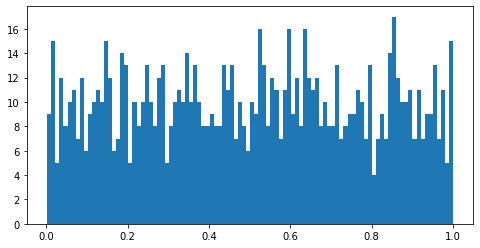

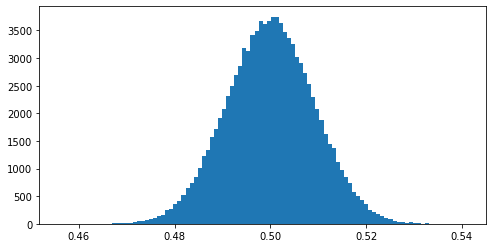

In [4]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use({'figure.figsize':(8, 4)})

def ShowData(data_list):
    plt.hist(data_list,100)
    plt.show()

#随机产生1000个0～1之间均匀分布的数
u = np.random.uniform(0.0,1.0,1000)
#统计不同区间段(如[0~0.01]～[0.09～1])的数字出现的次数
ShowData(u)

all = []
for i in range(100000):
    #随机产生1000个0～1之间均匀分布的数
    u = np.random.uniform(0.0,1.0,1000)
    #计算平均值
    data = np.mean(u)
    all.append(data)
#再统计不同区间段(如[0~0.01]～[0.09～1])的数字出现的次数
ShowData(all)

# 差分还原

In [5]:
import pandas as pd
time_series = pd.Series([10,21,23,4,54,66,17,28,19,120,101,102,13],index=pd.date_range(start='2000', periods=13, freq='a'))
time_series_diff = time_series.diff(1)

time_series_shift = time_series.shift(1)
diff_recover = time_series_diff.add(time_series_shift)
diff_recover[0] = time_series[0]
print(diff_recover)

2000-12-31     10.0
2001-12-31     21.0
2002-12-31     23.0
2003-12-31      4.0
2004-12-31     54.0
2005-12-31     66.0
2006-12-31     17.0
2007-12-31     28.0
2008-12-31     19.0
2009-12-31    120.0
2010-12-31    101.0
2011-12-31    102.0
2012-12-31     13.0
Freq: A-DEC, dtype: float64


# 移动平均还原

In [6]:
import pandas as pd
time_series = pd.Series([15,2,3,4,5,6,7,8,9,10,11,102,13])
rol_mean = time_series.rolling(window=3).mean()
rol_sum = time_series.rolling(window=2).sum()
rol_recover = rol_mean*3 - rol_sum.shift(1)
rol_recover

0       NaN
1       NaN
2       3.0
3       4.0
4       5.0
5       6.0
6       7.0
7       8.0
8       9.0
9      10.0
10     11.0
11    102.0
12     13.0
dtype: float64

# 平滑+差分还原

In [7]:
import pandas as pd
time_series = pd.Series([1,3,2,5,4,6,3,2,8,0,11,16,11])

#周期3平滑
raw_mean = time_series.rolling(window=3).mean()
raw_sum = time_series.rolling(window=2).sum()
#一阶差分
mean_diff = raw_mean.diff(1)

#一阶差分还原
mean_shift = raw_mean.shift(1)
mean_recover = mean_shift.add(mean_diff)
mean_recover[0] = raw_mean[0]
# 移动平均还原
time_series_recover = mean_recover*3 - raw_sum.shift(1)
time_series_recover

0      NaN
1      NaN
2      NaN
3      5.0
4      4.0
5      6.0
6      3.0
7      2.0
8      8.0
9      0.0
10    11.0
11    16.0
12    11.0
dtype: float64

# ROC/AUX

fpr: [0.         0.02083333 0.125      0.125      0.14583333 0.14583333
 0.16666667 0.16666667 0.20833333 0.20833333 0.22916667 0.22916667
 0.25       0.25       0.3125     0.3125     0.35416667 0.35416667
 0.375      0.375      0.39583333 0.39583333 0.45833333 0.45833333
 0.54166667 0.54166667 0.5625     0.5625     0.58333333 0.58333333
 0.60416667 0.60416667 0.6875     0.6875     0.75       0.75
 0.77083333 0.77083333 0.8125     0.8125     0.83333333 0.83333333
 0.85416667 0.85416667 0.95833333 0.95833333 1.         1.        ]
tpr: [0.         0.         0.         0.19607843 0.19607843 0.21568627
 0.21568627 0.25490196 0.25490196 0.29411765 0.29411765 0.31372549
 0.31372549 0.33333333 0.33333333 0.35294118 0.35294118 0.39215686
 0.39215686 0.41176471 0.41176471 0.45098039 0.45098039 0.49019608
 0.49019608 0.60784314 0.60784314 0.62745098 0.62745098 0.68627451
 0.68627451 0.7254902  0.7254902  0.74509804 0.74509804 0.78431373
 0.78431373 0.80392157 0.80392157 0.84313725 0.84313725 0

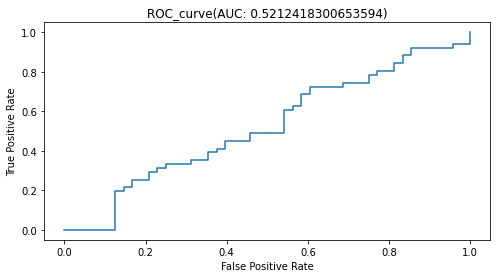

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve  
from sklearn.metrics import auc  

#y = np.array([1,1,2,2])
#pred = np.array([0.1, 0.4, 0.35, 0.8])

y = np.linspace(0,100,99).astype("int32")
y = y % 2
pred = np.random.rand(99,1).reshape(-1,)

fpr, tpr, thresholds = roc_curve(y, pred, pos_label=0) 
print('fpr: ' + str(fpr))
print('tpr: ' + str(tpr))
print('thresholds: ' + str(thresholds))

AUC = auc(fpr, tpr) 
print('AUC: ' + str(AUC))
 
plt.plot(fpr, tpr)  
plt.title('ROC_curve' + '(AUC: ' + str(AUC) + ')' )  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')  
plt.show()

In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
import numpy as np
raw = np.random.randint(1,10,size=5)
raw = raw.reshape(-1,1)
data = MinMaxScaler().fit_transform(raw)
print(raw.reshape(-1,))
print("=============================================")
print(data.reshape(-1,))
scaler = preprocessing.scale(raw)
print("=============================================")
print(scaler.reshape(-1,))

[9 7 9 3 5]
[1.         0.66666667 1.         0.         0.33333333]
[ 1.02899151  0.17149859  1.02899151 -1.54348727 -0.68599434]


In [10]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [11]:
import cv2
print(cv2.__version__)

4.3.0


In [12]:
import sklearn
print(sklearn.__version__)

0.23.2


In [13]:
import numpy
print(numpy.__version__)

1.16.2


In [14]:
import pandas
print(pandas.__version__)

1.1.0


In [15]:
from matplotlib import pyplot as plt
import matplotlib
print(matplotlib.__version__)

3.3.0


In [16]:
import seaborn as sns
print(sns.__version__)

0.10.1


# 归一化

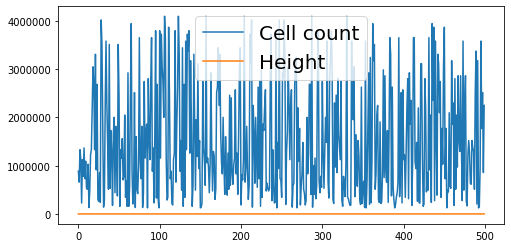

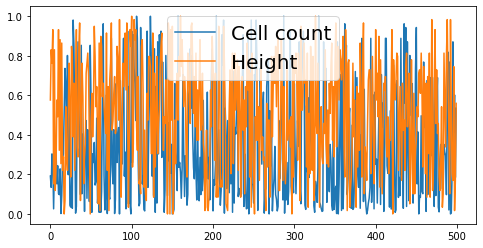

In [18]:
#归一化前
df1 = pd.read_csv('./data/500_Person_Gender_Height_Weight_Index.csv')


Height_scaled = df1['Height']
Weight_scaled = df1['Weight']*df1['Weight']*df1['Weight']
df2 = pd.DataFrame()
df2['Height'] = Height_scaled
df2['Cell'] = Weight_scaled

def show_data(x,y,label):
    li, = plt.plot(x, y,label=label)
    return li
plt.figure(figsize=(8,4))
line1 = show_data(df2.index,df2['Cell'],'Cell count')
line2 = show_data(df2.index,df2['Height'],'Height')
plt.legend(handles=[line1,line2],fontsize=20)
plt.ticklabel_format(style='plain',axis='both')

df3 = (df2-df2.min())/(df2.max()-df2.min())
def show_data2(x,y,label):
    li, = plt.plot(x, y,label=label)
    return li
plt.figure(figsize=(8,4))
line1 = show_data2(df3.index,df3['Cell'],'Cell count')
line2 = show_data2(df3.index,df3['Height'],'Height')
plt.legend(handles=[line1,line2],fontsize=20)
plt.ticklabel_format(style='plain',axis='both') 

In [43]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
a = np.array(df1['Height'].tolist())
a = a.reshape(-1, 100)
ms = MinMaxScaler(feature_range=(-1, 1))
data_scaled = ms.fit_transform(a)
data_recovered = ms.inverse_transform(data_scaled)
print("raw:\n",data)
print("scaled:\n",data_scaled)
print("recovered:\n",data_recovered)
#print('b:\n', b)

raw:
 [[174, 189, 185, 195, 149, 189, 147, 154, 174, 169, 195, 159, 192, 155, 191, 153, 157, 140, 144, 172, 157, 153, 169, 185, 172, 151, 190, 187, 163, 179, 153, 178, 195, 160, 157, 189, 197, 144, 171, 185, 175, 149, 157, 161, 182, 185, 188, 181, 161, 140, 168, 176, 163, 172, 196, 187, 172, 178, 164, 143, 191, 141, 193, 190, 175, 179, 172, 168, 164, 194, 153, 178, 141, 180, 185, 197, 165, 168, 176, 181, 164, 166, 190, 186, 168, 198, 175, 145, 159, 185, 178, 183, 194, 177, 197, 170, 142, 160, 195, 190, 199, 154, 161, 198, 192, 195, 166, 159, 181, 149, 150, 146, 190, 192, 177, 148, 165, 146, 144, 176, 168, 187, 187, 184, 158, 158, 194, 145, 182, 154, 168, 187, 158, 167, 171, 183, 190, 194, 171, 159, 169, 167, 180, 163, 140, 197, 194, 140, 195, 168, 196, 140, 150, 168, 155, 179, 182, 168, 187, 181, 199, 184, 192, 182, 172, 181, 176, 156, 151, 188, 187, 174, 167, 196, 197, 185, 170, 181, 166, 188, 162, 177, 162, 180, 192, 165, 167, 182, 161, 158, 141, 154, 165, 142, 141, 145, 157, 177, 16